# This is an entry level notebook to show how we can obtain Weather data:

*   Temperature
*   Precipitation
*   Humidity

**Load Datasets for each region**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
    path = r'/content' # file path
    all_files = glob.glob(path + "/*.csv")
    li = []
    for i in all_files:
        df = pd.read_csv(i, index_col=None, header=0)
        li.append(df)
    amh_obu_frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
amh_obu_frame.sample(10)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
4836,5/9/2013,36,25,0,13.6,8,0,4:19 AM,5:46 PM,4:58 AM,6:17 PM,20,34,34,31,20,13,56,1.1,1004,36,10,92,14,Amhara
688,11/30/2011,33,21,0,8.7,7,31,10:41 AM,10:54 PM,6:01 AM,5:49 PM,21,29,29,27,7,54,76,0.1,1010,33,6,126,4,Obuasi
4356,1/15/2012,21,10,0,8.7,5,50,11:19 PM,10:13 AM,6:30 AM,5:10 PM,9,18,18,18,9,0,59,0.0,1013,21,10,254,5,Amhara
7171,9/30/2019,25,21,0,6.0,5,5,6:56 AM,6:55 PM,5:33 AM,5:29 PM,21,25,25,23,38,84,92,31.9,1010,25,6,86,26,Amhara
1316,8/19/2013,33,19,0,11.6,7,87,4:57 PM,4:13 AM,6:01 AM,6:19 PM,21,28,28,26,8,45,79,1.6,1012,33,6,259,5,Obuasi
4213,8/25/2011,33,26,0,12.9,7,16,1:05 AM,3:05 PM,5:18 AM,6:08 PM,24,34,34,29,16,41,75,3.3,1006,33,10,114,11,Amhara
141,6/1/2010,34,22,0,12.7,7,63,10:14 PM,9:35 AM,5:51 AM,6:18 PM,24,30,30,26,7,67,88,2.2,1013,34,4,203,5,Obuasi
2772,8/14/2017,29,22,0,7.5,5,47,11:49 PM,11:33 AM,6:02 AM,6:21 PM,22,27,27,24,8,82,90,8.7,1013,29,5,240,5,Obuasi
2498,11/13/2016,33,21,0,10.2,7,96,5:03 PM,4:41 AM,5:56 AM,5:47 PM,22,29,29,26,6,52,82,0.6,1009,33,6,165,4,Obuasi
6922,1/24/2019,27,18,0,8.7,6,73,8:51 PM,8:57 AM,6:28 AM,5:17 PM,9,21,21,21,14,24,48,1.6,1019,27,10,255,9,Amhara


In [ ]:
#Feature Engineering of Time Series Column
amh_obu_frame['date_time'] = pd.to_datetime(amh_obu_frame['date_time'], format='%m/%d/%Y')
amh_obu_frame['year']=amh_obu_frame['date_time'].dt.year 
amh_obu_frame['month']=amh_obu_frame['date_time'].dt.month 
amh_obu_frame['day']=amh_obu_frame['date_time'].dt.day

In [ ]:
amh_obu_frame.sample(10)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month,day
1707,2014-09-14,30,21,0,10.5,5,56,10:55 PM,10:44 AM,5:58 AM,6:07 PM,23,28,28,25,9,82,89,3.4,1013,30,5,220,6,Obuasi,2014,9,14
5991,2016-07-07,35,27,0,12.2,7,14,7:36 AM,8:50 PM,4:54 AM,6:37 PM,25,37,37,30,20,53,73,0.3,1000,35,10,97,14,Amhara,2016,7,7
3262,2018-12-17,38,23,0,8.7,7,65,1:40 PM,1:18 AM,6:10 AM,5:56 PM,20,32,32,30,5,14,63,0.0,1013,38,9,172,4,Obuasi,2018,12,17
2785,2017-08-27,28,21,0,9.0,5,32,10:38 AM,10:49 PM,6:00 AM,6:16 PM,22,27,27,24,6,84,91,0.9,1014,28,5,204,4,Obuasi,2017,8,27
2648,2017-04-12,35,24,0,12.1,6,86,7:26 PM,6:53 AM,6:00 AM,6:14 PM,24,32,32,28,10,40,81,0.0,1009,35,8,234,7,Obuasi,2017,4,12
6804,2018-09-28,34,26,0,10.2,7,68,7:52 PM,8:12 AM,5:32 AM,5:31 PM,22,34,34,30,7,48,62,0.0,1010,34,10,291,5,Amhara,2018,9,28
2579,2017-02-02,35,22,0,11.6,7,39,10:38 AM,11:08 PM,6:24 AM,6:16 PM,22,31,31,28,5,50,74,0.0,1012,35,7,200,3,Obuasi,2017,2,2
2221,2016-02-10,38,16,0,11.6,7,12,7:51 AM,8:12 PM,6:24 AM,6:18 PM,7,28,28,28,8,0,35,0.0,1012,38,10,142,5,Obuasi,2016,2,10
86,2010-04-07,36,22,0,11.6,7,32,12:59 AM,1:03 PM,6:03 AM,6:15 PM,23,32,32,28,8,50,77,0.0,1007,36,6,222,5,Obuasi,2010,4,7
4138,2011-06-11,37,28,0,13.9,8,70,1:56 PM,12:43 AM,4:47 AM,6:33 PM,23,38,38,33,18,22,57,0.2,1000,37,10,80,13,Amhara,2011,6,11


In [ ]:
ethiopia_frame.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location',
       'year', 'month', 'day'],
      dtype='object')

In [ ]:
#Drop irrelevant columns
ethiopia_frame = ethiopia_frame.drop(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'pressure', 'visibility', 'winddirDegree', 'windspeedKmph'], axis = 1)

In [ ]:
ethiopia_frame.columns

Index(['humidity', 'precipMM', 'tempC', 'location', 'year', 'month', 'day'], dtype='object')

In [ ]:
ethiopia_frame.head(10)

,humidity,precipMM,tempC,location,year,month,day
0,66,0.0,22,Adis-Abeba,2010,1,11
1,60,0.0,20,Adis-Abeba,2010,1,12
2,42,0.0,23,Adis-Abeba,2010,1,13
3,40,0.0,24,Adis-Abeba,2010,1,14
4,42,0.0,24,Adis-Abeba,2010,1,15
5,59,0.0,20,Adis-Abeba,2010,1,16
6,64,0.0,22,Adis-Abeba,2010,1,17
7,55,0.0,21,Adis-Abeba,2010,1,18
8,57,0.1,19,Adis-Abeba,2010,1,19
9,61,0.0,21,Adis-Abeba,2010,1,20


**Exploratory Data Analysis**

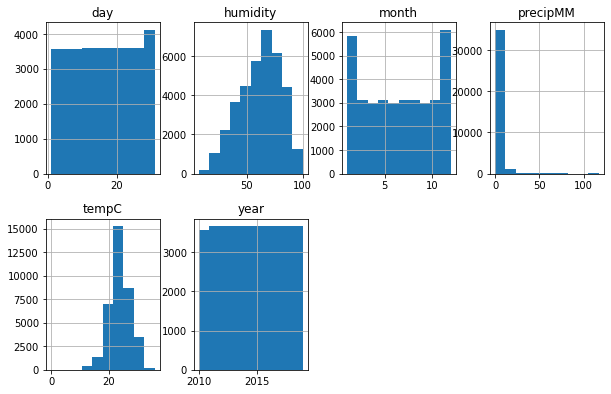

In [ ]:
hist = ethiopia_frame.hist(figsize=(10,10),layout=(3,4))

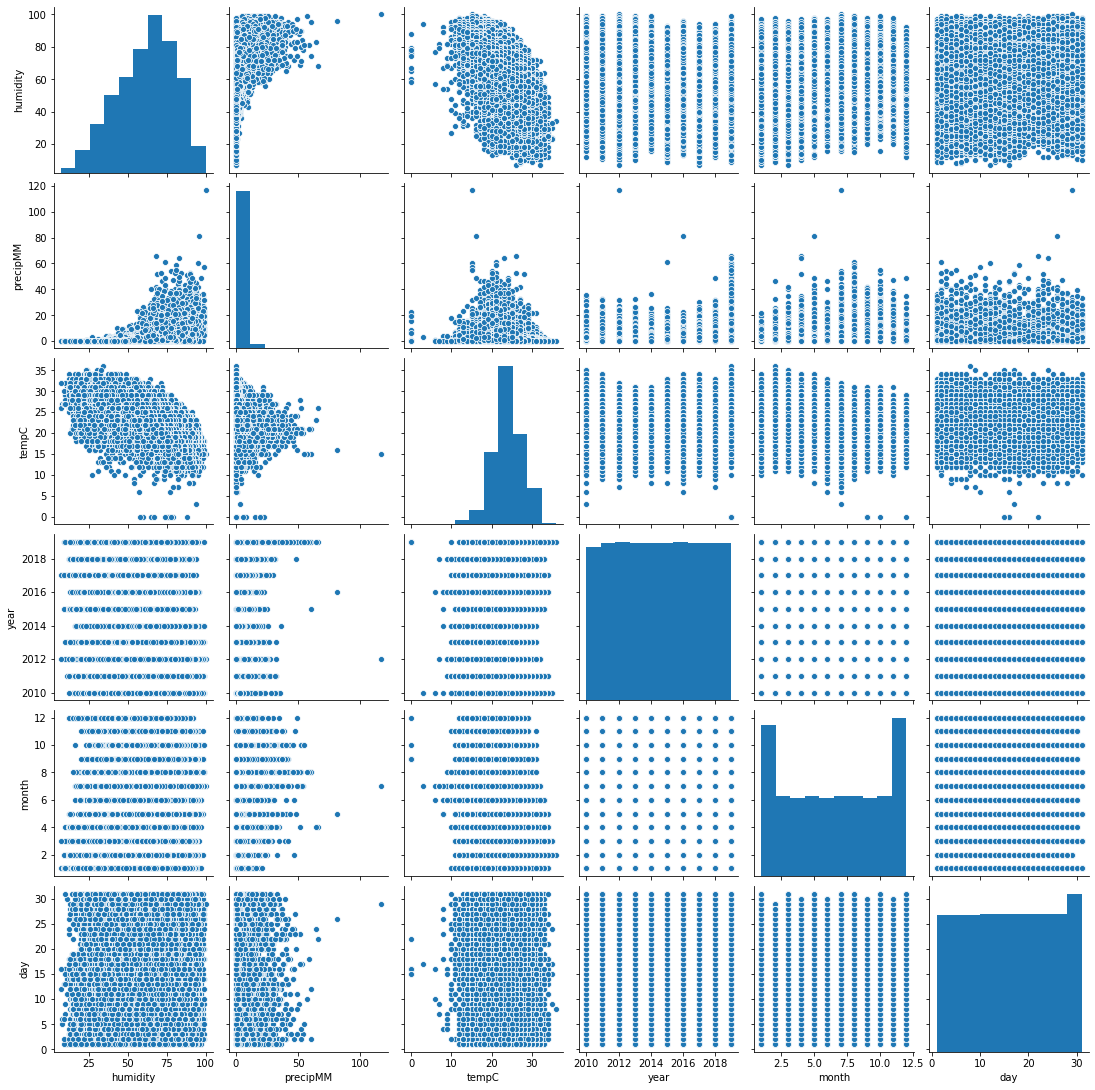

In [ ]:
sns.pairplot(ethiopia_frame)
plt.show()

In [ ]:
#correlations
corr=ethiopia_frame.corr()
corr.style.background_gradient(cmap='CMRmap')

,humidity,precipMM,tempC,year,month,day
humidity,1.000000,0.423599,-0.573436,-0.122520,0.244451,0.018671
precipMM,0.423599,1.000000,-0.209851,0.150231,0.054274,-0.003556
tempC,-0.573436,-0.209851,1.000000,0.047624,-0.237137,-0.009721
year,-0.122520,0.150231,0.047624,1.000000,-0.006813,-0.005172
month,0.244451,0.054274,-0.237137,-0.006813,1.000000,0.005716
day,0.018671,-0.003556,-0.009721,-0.005172,0.005716,1.000000


In [ ]:
ethiopia_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36420 entries, 0 to 36419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humidity  36420 non-null  int64  
 1   precipMM  36420 non-null  float64
 2   tempC     36420 non-null  int64  
 3   location  36420 non-null  object 
 4   year      36420 non-null  int64  
 5   month     36420 non-null  int64  
 6   day       36420 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ MB


In [ ]:
ethiopia_frame.describe

<bound method NDFrame.describe of        humidity  precipMM  tempC    location  year  month  day
0            66       0.0     22  Adis-Abeba  2010      1   11
1            60       0.0     20  Adis-Abeba  2010      1   12
2            42       0.0     23  Adis-Abeba  2010      1   13
3            40       0.0     24  Adis-Abeba  2010      1   14
4            42       0.0     24  Adis-Abeba  2010      1   15
...         ...       ...    ...         ...   ...    ...  ...
36415        62       9.2     23     Mek-ele  2019     12   27
36416        61       8.6     22     Mek-ele  2019     12   28
36417        68      14.1     20     Mek-ele  2019     12   29
36418        71      19.8     20     Mek-ele  2019     12   30
36419        75      21.0     18     Mek-ele  2019     12   31

[36420 rows x 7 columns]>

In [ ]:
ethiopia_frame.isnull().sum()

humidity    0
precipMM    0
tempC       0
location    0
year        0
month       0
day         0
dtype: int64

**Feature Engineering of dataset**

In [ ]:
#A function for feature classification 
def risk(row):
    if row['tempC'] < 22:
        val = 'low'
    elif row['tempC'] > 22 or row['tempC'] < 32:
        val = 'high'
    else:
        val = 'moderate'
    return val

In [ ]:
#Create a new column using the function above
ethiopia_frame['risk_temp'] = ethiopia_frame.apply(risk, axis=1)

In [ ]:
ethiopia_frame.sample(10)

,humidity,precipMM,tempC,location,year,month,day,risk_temp
28251,68,0.1,25,Awasa,2017,7,30,high
14099,67,0.7,21,Dessie,2018,9,19,low
10893,70,0.0,25,Shashamane,2019,11,29,high
3027,67,7.4,23,Adis-Abeba,2018,4,26,high
33021,47,0.3,20,Mek-ele,2010,9,11,low
8972,86,2.7,21,Shashamane,2014,8,26,low
7892,84,2.0,22,Shashamane,2011,9,11,high
12232,69,1.6,21,Dessie,2013,8,9,low
22921,65,0.0,25,Jimma,2012,12,15,high
2110,62,0.0,23,Adis-Abeba,2015,10,22,high


In [ ]:
#A function for feature classification
def risk(row):
    if row['precipMM'] < 450:
        val = 'low'
    elif row['precipMM'] > 450 or row['precipMM'] < 700:
        val = 'high'
    else:
        val = 'moderate'
    return val

In [ ]:
#Create a new column using the function above
ethiopia_frame['risk_precip'] = ethiopia_frame.apply(risk, axis=1)

In [ ]:
ethiopia_frame.sample(10)

,humidity,precipMM,tempC,location,year,month,day,risk_temp,risk_precip
257,85,1.5,20,Adis-Abeba,2010,9,25,low,low
27288,62,0.0,24,Awasa,2014,12,10,high,low
19962,36,0.0,27,Dire-Dawa,2014,10,29,high,low
3860,88,1.4,22,Bahir-Dar,2010,8,17,high,low
19720,38,0.0,28,Dire-Dawa,2014,3,1,high,low
21970,94,7.0,20,Jimma,2010,5,9,low,low
17640,58,0.5,26,Gondar,2018,6,10,high,low
31258,61,5.4,25,Jijiga,2015,11,3,high,low
26654,58,0.0,29,Awasa,2013,3,16,high,low
901,78,3.6,22,Adis-Abeba,2012,6,30,high,low


In [ ]:
#A function for feature classification
def riskmetric(row):
    if row['risk_temp'] == 'low' and row['risk_precip'] == 'low':
        val = 'low'
    elif row['risk_temp'] == 'medium' and row['risk_precip'] == 'low':
        val = 'low'
    elif row['risk_temp'] == 'low' and row['risk_precip'] == 'medium':
        val = 'low'
    elif row['risk_temp'] == 'medium' and row['risk_precip'] == 'medium':
        val = 'medium'
    elif row['risk_temp'] == 'low' and row['risk_precip'] == 'high':
        val = 'medium'
    elif row['risk_temp'] == 'high' and row['risk_precip'] == 'low':
        val = 'medium'
    elif row['risk_temp'] == 'medium' and row['risk_precip'] == 'high':
        val = 'high'
    elif row['risk_temp'] == 'high' and row['risk_precip'] == 'medium':
        val = 'high'
    else:
        val = 'high'
    return val

In [ ]:
#Create a new column using the function above
ethiopia_frame['risk_condition'] = ethiopia_frame.apply(riskmetric, axis=1)

In [ ]:
ethiopia_frame.sample(10)

,humidity,precipMM,tempC,location,year,month,day,risk_temp,risk_precip,risk_condition
6737,73,4.9,23,Bahir-Dar,2018,7,3,high,low,medium
20654,59,3.3,27,Dire-Dawa,2016,9,20,high,low,medium
17856,13,0.0,27,Gondar,2019,1,12,high,low,medium
31236,54,0.3,29,Jijiga,2015,10,12,high,low,medium
18075,86,13.7,20,Gondar,2019,8,19,low,low,low
5607,60,1.7,28,Bahir-Dar,2015,5,30,high,low,medium
12617,59,0.5,24,Dessie,2014,8,29,high,low,medium
16701,55,0.0,26,Gondar,2015,11,14,high,low,medium
33308,83,0.9,13,Mek-ele,2011,6,25,low,low,low
3982,44,0.0,25,Bahir-Dar,2010,12,17,high,low,medium


In [ ]:
#Drop features that have been encoded
eth_df = ethiopia_frame.drop(['risk_temp','risk_precip'],axis=1)
eth_df = pd.DataFrame(eth_df)
eth_df.head(5)

,humidity,precipMM,tempC,location,year,month,day,risk_condition
0,66,0.0,22,Adis-Abeba,2010,1,11,medium
1,60,0.0,20,Adis-Abeba,2010,1,12,low
2,42,0.0,23,Adis-Abeba,2010,1,13,medium
3,40,0.0,24,Adis-Abeba,2010,1,14,medium
4,42,0.0,24,Adis-Abeba,2010,1,15,medium


In [ ]:
#Encode target features
convert_numerics = {  "risk_condition": {"low": 1, "medium": 2, "high": 3},
                      "location": {"Adis-Abeba":1, "Bahir-Dar":2,"Shashamane":3, "Dessie":4, "Gondar":5,
                      "Dire-Dawa":6, "Jimma":7, "Awasa":8, "Jijiga":9, "Mek-ele":10} 
                    }

#convert the columns to numbers using replace
eth_df1 = eth_df.copy()
eth_df1.replace(convert_numerics, inplace=True)
eth_df1.head()

,humidity,precipMM,tempC,location,year,month,day,risk_condition
0,66,0.0,22,1,2010,1,11,2
1,60,0.0,20,1,2010,1,12,1
2,42,0.0,23,1,2010,1,13,2
3,40,0.0,24,1,2010,1,14,2
4,42,0.0,24,1,2010,1,15,2


In [ ]:
eth_df1.location.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
#eth_df1 = pd.get_dummies(eth_df1, columns=["location"])
eth_df1.sample(10)

,humidity,precipMM,tempC,location,year,month,day,risk_condition
27180,79,2.0,23,8,2014,8,24,2
17747,54,0.2,25,5,2018,9,25,2
10112,69,0.0,24,3,2017,10,9,2
10874,69,1.7,25,3,2019,11,10,2
17282,55,0.6,28,5,2017,6,17,2
32040,38,0.0,22,9,2017,12,24,2
29031,78,8.4,23,8,2019,9,18,2
10668,61,0.3,29,3,2019,4,18,2
389,61,0.0,22,1,2011,2,4,2
3167,71,2.9,21,1,2018,9,13,1


In [ ]:
#Check for missing values
eth_df1.isnull().sum()

humidity          0
precipMM          0
tempC             0
location          0
year              0
month             0
day               0
risk_condition    0
dtype: int64

# **Model Development**

In [ ]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
Y = eth_df1['risk_condition'] #Choose Target response
X = eth_df1.drop(['risk_condition','day','year'],axis=1)

In [ ]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [ ]:
GBRegressor = GradientBoostingRegressor()
prm = {
    "n_estimators":[250,500,750,1000],
    "max_depth":[16,32,64,128,256,None]
    }

In [ ]:
GS = GridSearchCV(GBRegressor,prm,cv=5)
GS.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
#Prediction
Predict_Y = GS.predict(X_test)

In [ ]:
#Evaluating algorithm performance
#RMSE Result
rmse = mean_squared_error(Y_test,Predict_Y)
print('Root Mean Squared Error: %.2f' % np.sqrt(rmse))
#Variance score: 1 is perfect prediction score
print('Test Variance Score: %.4f' % r2_score(Y_test, Predict_Y))
#print('R^2 Prediction Score: %.4f'% mScore)

Root Mean Squared Error: 0.00
Test Variance Score: 1.0000


In [ ]:
xgb_model = xgb.XGBClassifier().fit(X_train, Y_train)
predictions = xgb_model.predict(X_test)
actuals = Y_test

In [ ]:
#Evaluating algorithm performance
#RMSE Result
rmse = mean_squared_error(actuals,predictions)
print('Root Mean Squared Error: %.2f' % np.sqrt(rmse))
#Variance score: 1 is perfect prediction score
print('Test Variance Score: %.4f' % r2_score(actuals,predictions))
#print('R^2 Prediction Score: %.4f'% mScore)

Root Mean Squared Error: 0.00
Test Variance Score: 1.0000


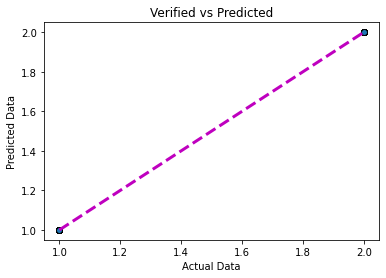

In [ ]:
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_Y, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()

In [ ]:
print(confusion_matrix(actuals1, predictions1))

XGBoostError: ignored